# CNN Implementation for MNIST Digit Recognition

### Install package required for https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits

In [1]:
!pip install ucimlrepo

### Import required libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# from tensorflow.keras.datasets import mnist

from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import  accuracy_score, precision_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
from sklearn.model_selection import KFold, cross_val_score

2024-05-01 11:10:12.801687: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 11:10:12.801737: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 11:10:12.802657: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-01 11:10:12.809336: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Read data and convert to numpy array from pandas dataframe

In [3]:
# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
data = optical_recognition_of_handwritten_digits.data

X = data.features
y = data.targets

X = X.to_numpy()
y = y.to_numpy()


# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)


{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'published_in': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, Bogazici University', 

In [4]:
# Load and preprocess the MNIST dataset
# (X_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
# print(X_train_mnist.shape)
# X_train_mnist = X_train_mnist.reshape(-1, 28, 28, 1).astype('float32') / 255.0
# x_test_mnist = x_test_mnist.reshape(-1, 28, 28, 1).astype('float32') / 255.0
# y_train_mnist = to_categorical(y_train_mnist, 10)
# y_test_mnist = to_categorical(y_test, 10)
# print(X_train_mnist.shape, y_train_mnist.shape)
# labels = [np.argmax(y) for y in y_train_mnist]

# _, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
# for ax, image, label in zip(axes, X_train_mnist, labels):
#     ax.set_axis_off()
#     print(label)
#     ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
#     ax.set_title("Training: %i" % label)

### do preprocessing like reshaping

Before reshaped: (5620, 64)
After reshaped: (5620, 8, 8, 1)
[4, 4, 4, 4, 8, 0, 4, 0, 5, 8]
4
4
4
4
8
0


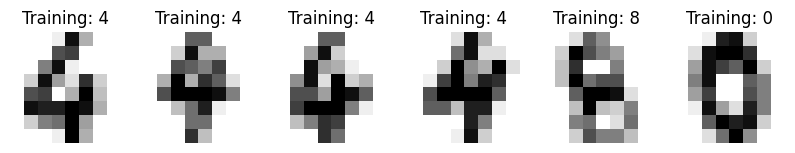

In [5]:
print("Before reshaped:", X.shape) # Original shape
X_reshaped = X.reshape(-1, 8, 8, 1).astype('float32')
y_reshaped = to_categorical(y, 10)
print("After reshaped:", X_reshaped.shape) # preprocessed shape

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)


labels = [np.argmax(y) for y in y_train]
print(labels[:10])
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, label in zip(axes, X_train, labels):
    ax.set_axis_off()
    print(label)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [6]:
# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train[0].shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/home/usd.local/pooja.singh/anaconda3/envs/myUsdProj/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-01 11:10:30.188388: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 31141 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:3b:00.0, compute capability: 7.0


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/10


2024-05-01 11:10:33.441222: I external/local_xla/xla/service/service.cc:168] XLA service 0x149344002e90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-01 11:10:33.441260: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2024-05-01 11:10:35.136702: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-01 11:10:36.817715: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-05-01 11:10:40.915541: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng11{k2=4,k3=0} for conv (f32[64,32,8,8]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,1,8,8]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward",

41/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4855 - loss: 1.5867  

I0000 00:00:1714579850.961329 3117825 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714579851.000493 3117825 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5560 - loss: 1.3906

W0000 00:00:1714579852.724873 3117826 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714579853.246964 3117822 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.5596 - loss: 1.3805 - val_accuracy: 0.9467 - val_loss: 0.1957
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9598 - loss: 0.1531 - val_accuracy: 0.9767 - val_loss: 0.0818
Epoch 3/10
 1/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 0.0506

W0000 00:00:1714579853.767172 3117823 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9760 - loss: 0.0948 - val_accuracy: 0.9478 - val_loss: 0.1476
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9723 - loss: 0.0914 - val_accuracy: 0.9844 - val_loss: 0.0433
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9906 - loss: 0.0396 - val_accuracy: 0.9844 - val_loss: 0.0447
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9928 - loss: 0.0245 - val_accuracy: 0.9911 - val_loss: 0.0367
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9892 - loss: 0.0315 - val_accuracy: 0.9889 - val_loss: 0.0362
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9987 - loss: 0.0087 - val_accuracy: 0.9922 - val_loss: 0.0313
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9950 - loss: 0.0199 - val_accuracy: 0.9833 - val_loss: 0.0504
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9911 - loss: 0.0305 - val_accuracy: 0.9900 - val_loss: 0.0297


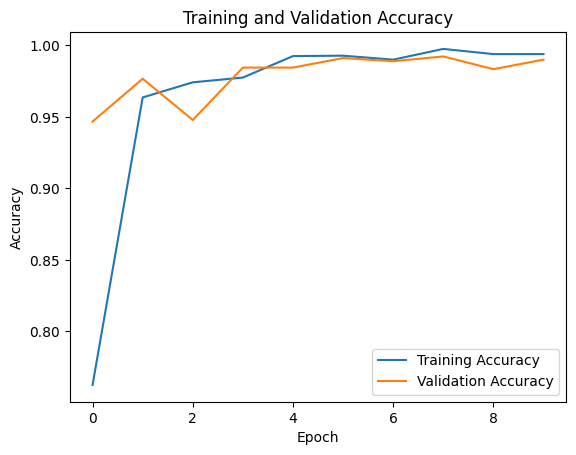

In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


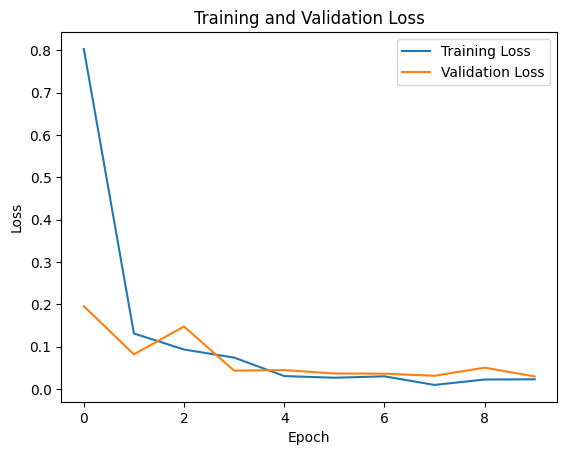

In [9]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - accuracy: 0.9912 - loss: 0.0266 
Test accuracy: 0.9866548180580139


W0000 00:00:1714579864.674982 3117826 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 1/36 ━━━━━━━━━━━━━━━━━━━━ 9s 261ms/step

W0000 00:00:1714579868.630244 3117826 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


W0000 00:00:1714579868.902502 3117823 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


F1 score: 0.986624754740344
Precision: 0.9868167421518946
AUC ROC: 0.9999153199893105


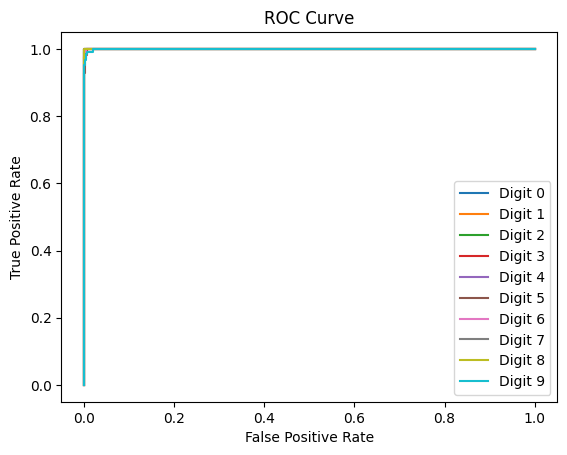

In [11]:
# Predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to predicted class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot encoded true labels to single labels
y_true = np.argmax(y_test, axis=1)

# Calculate F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print('F1 score:', f1)

# Calculate precision
precision = precision_score(y_true, y_pred, average='weighted')
print('Precision:', precision)

# Calculate AUC ROC
auc_roc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print('AUC ROC:', auc_roc)

# Plot ROC curve (optional)
fpr = dict()
tpr = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    plt.plot(fpr[i], tpr[i], label='Digit {}'.format(i))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [12]:
# Define K-fold cross-validation
# K-fold Model

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

x = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
acc_per_fold = []
loss_per_fold = []
fold_no = 1
for train, test in kfold.split(x, y):
  model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train[0].shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

  # Compile the model
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  # Train the model
  history = model.fit(x[train], y[train], epochs=5, batch_size=64)


  # Generate generalization metrics
  scores = model.evaluate(x[test], y[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

Epoch 1/5


/home/usd.local/pooja.singh/anaconda3/envs/myUsdProj/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4830 - loss: 1.6216 

W0000 00:00:1714579871.752856 3117826 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6192 - loss: 1.2260
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9514 - loss: 0.1445
Epoch 3/5
41/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9717 - loss: 0.1102 

W0000 00:00:1714579873.229211 3117826 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9756 - loss: 0.0934
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9884 - loss: 0.0424
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9909 - loss: 0.0307


W0000 00:00:1714579874.145377 3117823 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Score for fold 1: loss of 0.05792102590203285; compile_metrics of 98.30960631370544%
Epoch 1/5


W0000 00:00:1714579874.477054 3117826 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4315 - loss: 1.8804 

W0000 00:00:1714579876.385973 3117824 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5656 - loss: 1.4709
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9528 - loss: 0.1541
Epoch 3/5
41/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9829 - loss: 0.0661 

W0000 00:00:1714579877.229842 3117824 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9813 - loss: 0.0702
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9689 - loss: 0.0955
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9926 - loss: 0.0305


W0000 00:00:1714579878.094323 3117822 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Score for fold 2: loss of 0.03171519562602043; compile_metrics of 99.19928908348083%
Epoch 1/5


W0000 00:00:1714579878.356685 3117823 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


38/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4455 - loss: 1.7515 

W0000 00:00:1714579880.447638 3117823 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5879 - loss: 1.3329
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9683 - loss: 0.1026
Epoch 3/5
39/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9855 - loss: 0.0533 

W0000 00:00:1714579881.488319 3117822 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9851 - loss: 0.0536
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9881 - loss: 0.0453
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9954 - loss: 0.0192


W0000 00:00:1714579882.422557 3117824 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Score for fold 3: loss of 0.11737628281116486; compile_metrics of 96.26334309577942%
Epoch 1/5


W0000 00:00:1714579882.750029 3117823 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4779 - loss: 1.7042 

W0000 00:00:1714579884.622633 3117822 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6004 - loss: 1.3310
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9654 - loss: 0.1104
Epoch 3/5
34/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9724 - loss: 0.0820 

W0000 00:00:1714579885.474920 3117825 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9765 - loss: 0.0724
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9878 - loss: 0.0427
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9908 - loss: 0.0358


W0000 00:00:1714579886.425465 3117822 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Score for fold 4: loss of 0.08535650372505188; compile_metrics of 97.5978672504425%
Epoch 1/5


W0000 00:00:1714579886.707664 3117824 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


64/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6570 - loss: 1.1968

W0000 00:00:1714579889.150055 3117824 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6772 - loss: 1.1303
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9639 - loss: 0.1183
Epoch 3/5
 1/71 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9688 - loss: 0.0954

W0000 00:00:1714579890.017805 3117824 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9728 - loss: 0.0824
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9862 - loss: 0.0468
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9858 - loss: 0.0368


W0000 00:00:1714579890.981434 3117823 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Score for fold 5: loss of 0.04742784425616264; compile_metrics of 98.39857816696167%


W0000 00:00:1714579891.255771 3117826 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


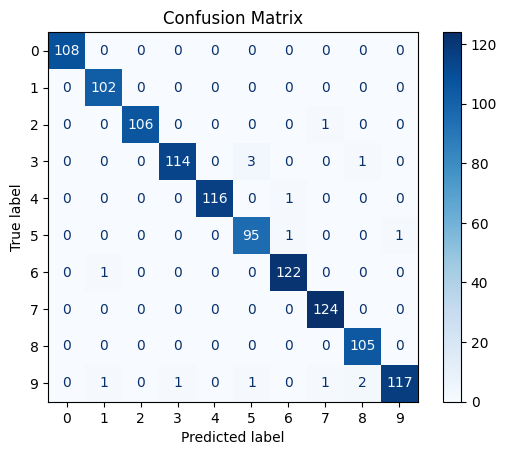

In [13]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### END